In [1]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

## Where does the t distribution come from?
The t-distribution appears when you _try_ to standardize the mean of your sample by dividing by the sample standard deviation. If the mean and sample standard deviation were independent, this would just be a gaussian distribution. But they're not independent--the sample SD depends on the mean (this is also why we use the `ddof=1` correction factor)!

In [65]:
# generate a million samples of length `n`
n = 2
rands = np.random.randn(n, 1000000)

In [66]:
# compute the t statistic for each sample (this uses the sample SD)
t = rands.mean(axis=0) / (rands.std(axis=0, ddof=1) / np.sqrt(n))

# also compute the z statistic for each sample (this uses the known SD = 1)
# this will actually be gaussian distributed
z = rands.mean(axis=0) / (1 / np.sqrt(n))

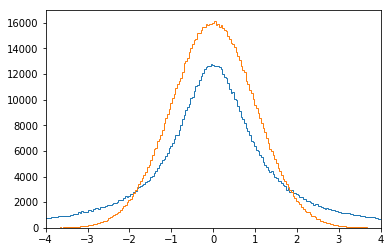

In [67]:
# if we histogram them we can see that the t distribution is different:
# it has a peakier middle and heavier tails
plt.hist(t, np.linspace(-10, 10, 500), histtype='step');
plt.hist(z, np.linspace(-10, 10, 500), histtype='step');
plt.xlim(-4, 4);

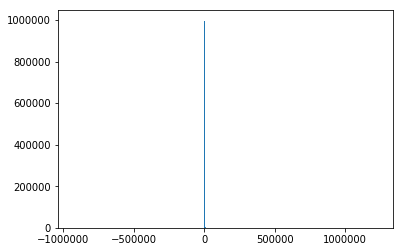

In [68]:
# in this particular case (n=2) it also has infinite variance, meaning that 
# it can take on incredibly extreme values
plt.hist(t, 500, histtype='step');

In [69]:
# what would happen if we assumed that these things came from a gaussian distribution when they don't?
# let's try by testing whether each sample is from a gaussian distribution that has a mean greater than zero
# (the answer should be NO or NOT SIGNIFICANT since we _are_ actually sampling from a standard normal dist.)
n2 = 5
rands2 = np.random.randn(n2, 100000)

In [70]:
means = rands2.mean(0)
s = rands2.std(0, ddof=1)

In [71]:
from scipy.stats import norm

In [72]:
# if the sample mean has a gaussian distribution with SD = sem, 
# what's the probability of observing a value this large under the null hypothesis

# note that this is WRONG, this is NOT a z statistic because it divides by the sample standard deviation
z2_bad = means / (s / np.sqrt(n2))

In [75]:
z_p_vals = norm.sf(z2_bad)

In [76]:
# since we sampled from the null distribution, we should find almost exactly 5% of the results
# are significant at the p<0.05 level (that's what p<0.05 means)
# but we don't! this test is WRONG! it is OVERESTIMATING the significance

(z_p_vals < 0.05).mean()

0.08733

In [77]:
# the correct test is the T TEST
import scipy.stats

In [79]:
t_stats,t_p_vals = scipy.stats.ttest_1samp(rands, 0, axis=0)

In [80]:
# when we do a t test we find that, indeed, 5% of the sample means are "significantly" different from 0
# at a p<0.05 level. this is CORRECT
(t_p_vals < 0.05).mean()

0.049969